<a href="https://colab.research.google.com/github/jmvilla12/apprentissage-supervise/blob/Branch-Sebastian/Supervised_classification_TP1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TRNU.CSN: Supervised Classification TP1 2025

Vincent Itier, Juan-Manuel Miramont

### Imports

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#TODO ADD other needed libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import Perceptron

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


## Data Set Information

This is perhaps the best known database to be found in the pattern recognition literature. Fisher’s
paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for
example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of
iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable
from each other. The predicted attribute (the output) is the class of iris plant.

### Features Information

1. sepal length in cm
1. sepal width in cm
1. petal length in cm
1. petal width in cm
1. classes: Iris Setosa, Iris Versicolour, Iris Virginica

## Exercises
In this TP, you are supposed to play with different classification techniques.

Objectives are: learning how to handle data for supervised classification, applying some well known ML methods and evaluate them.

### 1. Data visualisation
1. Laod the 'iris.csv' file using the pandas librairy.
1. Show the raw dataset using `head()`.
1. Show data using `seaborn.pairplot`.

In [ ]:
path = ('iris.csv')
dataset = pd.read_csv(path)
print(dataset.head(10))
#Methods for printing info in RAW


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa


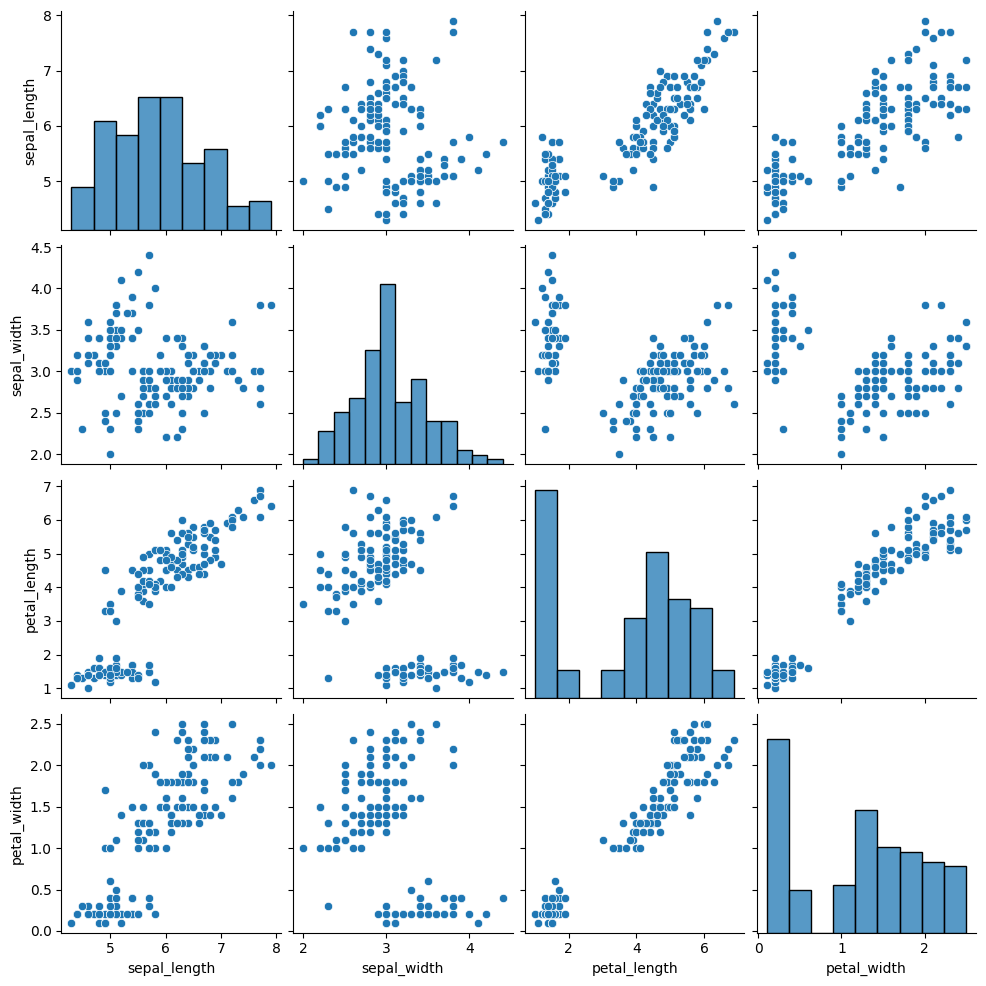

In [ ]:
sns.pairplot(dataset)
#For printing in plot

### 2. Dataset preprocessing
1. Make two numpy array $X$ and $y$, they contain respectively the set of feature vector and their label.
1. Map label to integer using `LabelEncoder` from `sklearn.preprocessing`. Now you got the set of feature vector and their corresponding true label.
1. T-distributed Stochastic Neighbor Embedding (t-SNE) is a machine learning algorithm for visualization. It can be used from `sklearn.manifold.TSNE`. Embed data (not label) into two dimension. Plot these points using their labels to color them. Change the perplexity parameter.

In [ ]:
x = dataset[["sepal_length","sepal_width","petal_length","petal_width"]].values
Y = dataset["species"].values

#print(x)
#print(Y)

In [ ]:
#Map label to integer using LabelEncoder from sklearn.preprocessing.
#Now you got the set of feature vector and their corresponding true label.
le = LabelEncoder()
y = le.fit_transform(y)
#print(y_encoded)


<Axes: >

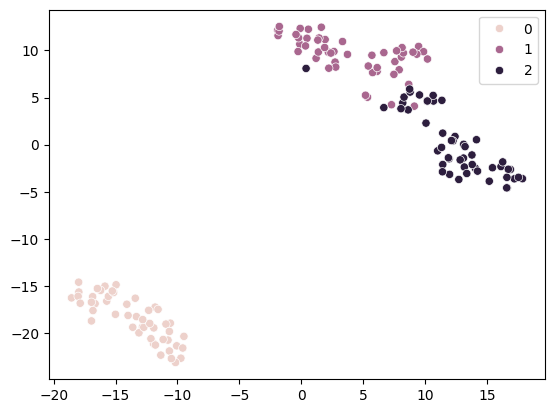

In [ ]:
#T-distributed Stochastic Neighbor Embedding (t-SNE) is a machine learning
#algorithm for visualization. It can be used from sklearn.manifold.TSNE. Embed data (not label) into two dimension.
#Plot these points using their labels to color them. Change the perplexity parameter.
X_embedded = TSNE(n_components=2, perplexity=20, learning_rate='auto', init='random').fit_transform(X)
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y, legend="full")

### 3. Classifier comparison.
__Note__ that in this database, we do not have test data, so in order to validate the best classification technique (and the best parameters of the technique), we will use cross-validation techniques.

1. From what we observe, we can think of using linear classifier such as `LinearDiscriminantAnalysis` from `sklearn.discriminant_analysis`. Use `KFold` from `sklearn.model_selection` to train and evaluate the classifier on 5 differents folds. For the evaluation, we will use the accuracy. Display and comment on the mean and standard deviation of the results.
1. Make a function, `cross_val_acc_std` that is adapted from the previous code, we will use to compare different classifier.
1. We observe that the linear classifier is not enough, make a list of different classifier `SVC` with an 'rbf' kernel, `QuadraticDiscriminantAnalysis`, `Perceptron`, use your function to evaluate them and plot the score using errorbars.

__Note__ Once the models is validated, all the data can be used to train it.

In [119]:
clfs = [SVC(kernel='rbf'), QuadraticDiscriminantAnalysis(), Perceptron(), LinearDiscriminantAnalysis()]
c_name = [c.__class__.__name__ for c in clfs]
#print(c_name)

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(120, 4) (30, 4) (120,) (30,)


In [141]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree = decision_tree.fit(X_train, y_train)

<Axes: >

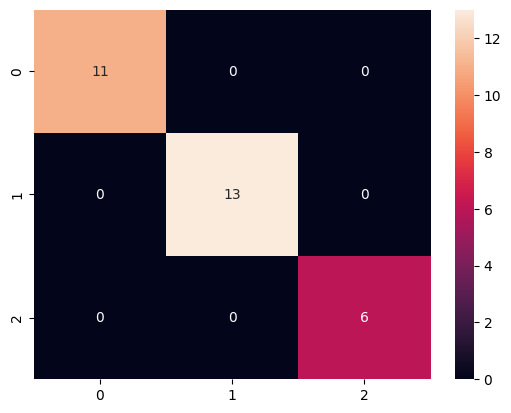

In [142]:
from sklearn.metrics import confusion_matrix

y_pred = decision_tree.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [143]:
#xddddd

### 4. Decision Tree
1. Split the dataset into training and test sets.
1. Using `tree.DecisionTreeClassifier()` from scikit-learn, build a decision tree fitting your training set. We have studied information gain as splitting criterion. It can be used by setting the argument criterion.
1. Predict the class of test samples.
1. Test and comment DecisionTreeClassifier optional parameters, using `classification_report` from scikit-learn
1. Plot confusion matrix

### 5. Tree Interpretation
1. Show the decision tree using options such as `feature_names`, `class_names`, `filled` \dots
1. Using `feature_importances_` attribute from tree, show the most discriminative features.
1. Plot the regions of decision between "sepal_length", "sepal_width", on a grid from 4 to 8.5 on x and from 1.5 to 4.5 on y axis, using `meshgrid()` from numpy. Add the points of the training set superimposed.